Так как время работы на одном потоке не зависит от величины threshold, то наибольшее ускорение достигается при наименьшем времени работы при заданном числе потоков.

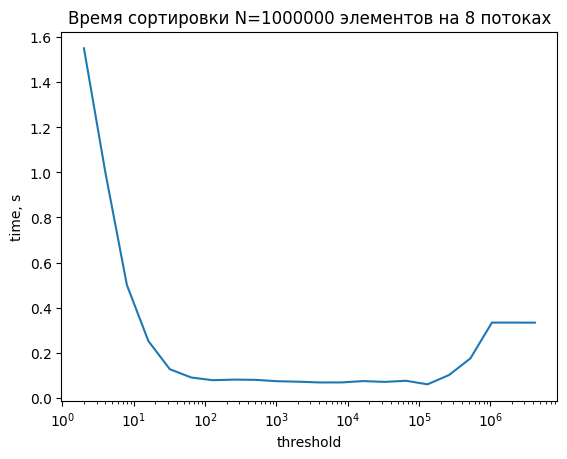

In [4]:
import matplotlib.pyplot as plt

merge_t = [1.54995, 0.998276, 0.500444, 0.252193, 0.126928, 0.0902379, 0.0783875, 0.0810071, 0.079925, 0.0738376, 0.0717002, 0.0683453, 0.0685495, 0.0744164, 0.0708829, 0.0757917, 0.060101, 0.10106, 0.175269, 0.333747, 0.333799, 0.333531]
threshold = [2**x for x in range(1, 23)]

plt.plot(threshold, merge_t)
plt.title("Время сортировки N=1000000 элементов на 8 потоках")
plt.xlabel("threshold")
plt.ylabel("time, s")
plt.xscale("log")

Построим графики ускорения и эффективности при threshold $\in \{10^1, 10^2, 10^3, 10^4\}$

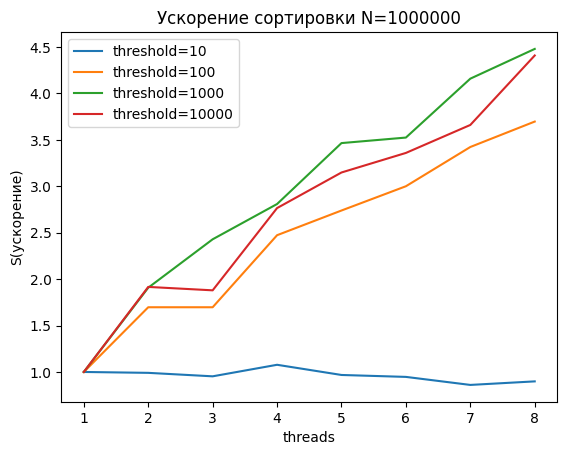

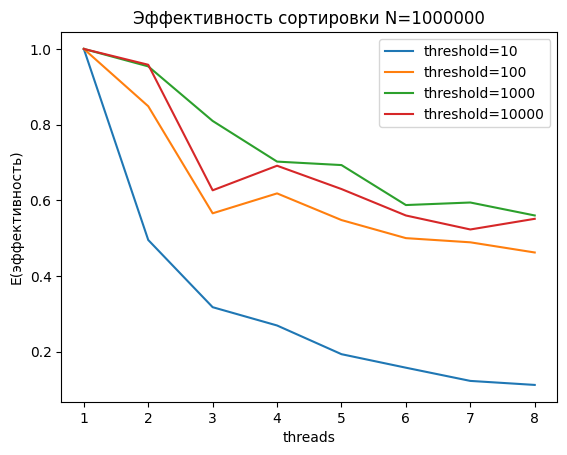

In [14]:
t10 = [0.383704, 0.387395, 0.4026, 0.35615, 0.396546, 0.40523, 0.44595, 0.427019]
t100 = [0.344608, 0.203051, 0.203049, 0.139333, 0.125799, 0.114841, 0.100659, 0.0931993]
t1000 = [0.341655, 0.179086, 0.140642, 0.12162, 0.0985812, 0.0969184, 0.0821346, 0.0762603]
t10000 = [0.341073, 0.177989, 0.181477, 0.123328, 0.108313, 0.10152, 0.0931633, 0.0773516]

def plot_S(ts : list[float], n):
    S = [ts[0]/t for t in ts]
    p = [x+1 for x in range(8)]
    plt.plot(p, S, label=f"threshold={n}")

def plot_E(ts : list[float], n):
    S = [ts[0]/t for t in ts]
    E = [s/(p+1) for p, s in enumerate(S)]
    p = [x+1 for x in range(8)]
    plt.plot(p, E, label=f"threshold={n}")

plot_S(t10, 10)
plot_S(t100, 100)
plot_S(t1000, 1000)
plot_S(t10000, 10000)
plt.title("Ускорение сортировки N=1000000")
plt.xlabel("threads")
plt.ylabel("S(ускорение)")
plt.legend()
plt.show()

plot_E(t10, 10)
plot_E(t100, 100)
plot_E(t1000, 1000)
plot_E(t10000, 10000)
plt.title("Эффективность сортировки N=1000000")
plt.xlabel("threads")
plt.ylabel("E(эффективность)")
plt.legend()

Теперь при достижении порога будем использовать сортировку вставками.

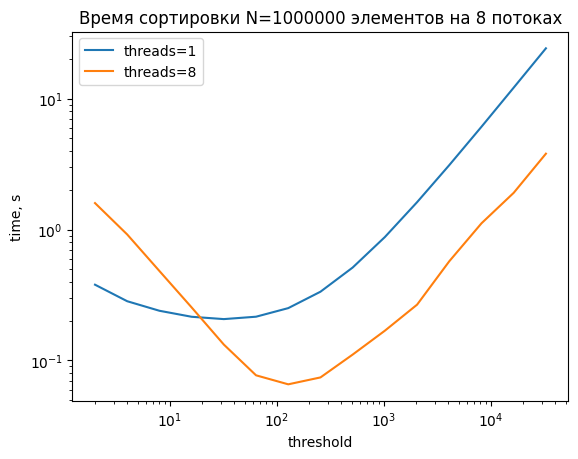

In [19]:
hybrid_t8 = [1.59494, 0.918012, 0.482855, 0.254398, 0.132332, 0.0770566, 0.0657629, 0.0742474, 0.110975, 0.168951, 0.267091, 0.57319, 1.11771, 1.9108, 3.80403]
hybrid_t1 = [0.379493, 0.283692, 0.239873, 0.215821, 0.207145, 0.216063, 0.251308, 0.335388, 0.513174, 0.877514, 1.62063, 3.11132, 6.11058, 12.1585, 24.2746]
threshold = [2**x for x in range(1, 16)]

plt.plot(threshold, hybrid_t1, label="threads=1")
plt.plot(threshold, hybrid_t8, label="threads=8")
plt.title("Время сортировки N=1000000 элементов на 8 потоках")
plt.xlabel("threshold")
plt.ylabel("time, s")
plt.xscale("log")
plt.yscale("log")
plt.legend()

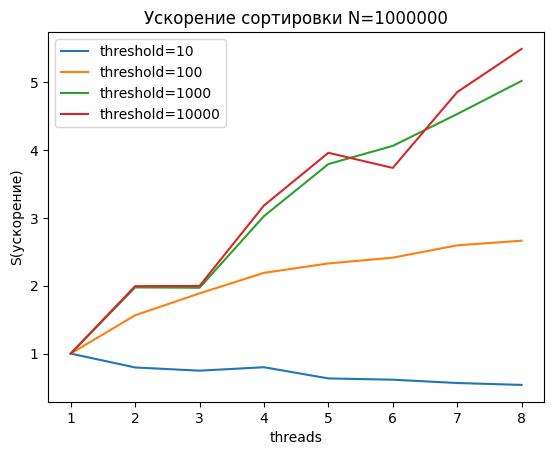

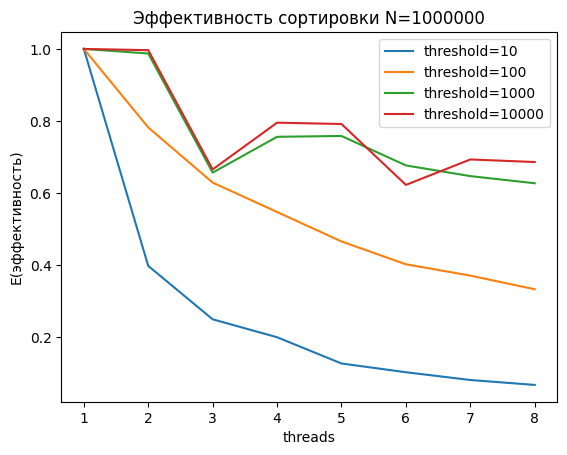

In [15]:
t10 = [0.253394, 0.318614, 0.338695, 0.317274, 0.399808, 0.411983, 0.447404, 0.470907]
t100 = [0.210689, 0.1347, 0.111677, 0.0962369, 0.0905228, 0.0873224, 0.0812007, 0.0791321]
t1000 = [0.874849, 0.443054, 0.444171, 0.289287, 0.230732, 0.215503, 0.193195, 0.174382]
t10000 = [6.10721, 3.06432, 3.0593, 1.91989, 1.54311, 1.63511, 1.25866, 1.11283]

plot_S(t10, 10)
plot_S(t100, 100)
plot_S(t1000, 1000)
plot_S(t10000, 10000)
plt.title("Ускорение сортировки N=1000000")
plt.xlabel("threads")
plt.ylabel("S(ускорение)")
plt.legend()
plt.show()

plot_E(t10, 10)
plot_E(t100, 100)
plot_E(t1000, 1000)
plot_E(t10000, 10000)
plt.title("Эффективность сортировки N=1000000")
plt.xlabel("threads")
plt.ylabel("E(эффективность)")
plt.legend()